In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [113]:
import os
import sqlite3
import csv

current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)
file_dir = os.path.join(project_root, "db.sqlite3")
connection = sqlite3.connect(file_dir)
cursor = connection.cursor()

cursor.execute("""
    SELECT 
        restaurant_order.datetime, 
        restaurant_product.name, 
        restaurant_product.price, 
        restaurant_orderitem.quantity
    FROM 
        restaurant_order
    JOIN 
        restaurant_orderitem ON restaurant_order.id = restaurant_orderitem.order_id
    JOIN 
        restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
""")

result = cursor.fetchall()

headers = ["Datetime", "ProductName", "ProductPrice", "Quantity"]
with open('order_products.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(headers)
    csv_writer.writerows(result)


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

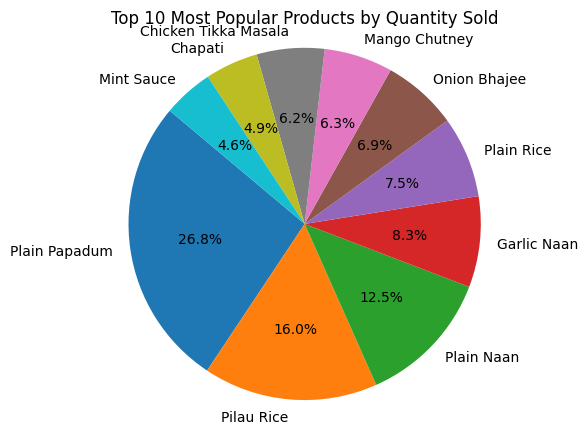

In [114]:
df = pd.read_csv('order_products.csv')
df["Datetime"] = pd.to_datetime(df["Datetime"])

group_product_py_quantity = df.groupby("ProductName")["Quantity"].sum()
top_10_group_product_py_quantity = group_product_py_quantity.nlargest(10)

plt.figure(figsize=(5, 5))
plt.pie(
    top_10_group_product_py_quantity,
    labels=top_10_group_product_py_quantity.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Top 10 Most Popular Products by Quantity Sold')
plt.axis('equal')
plt.show()

 # Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

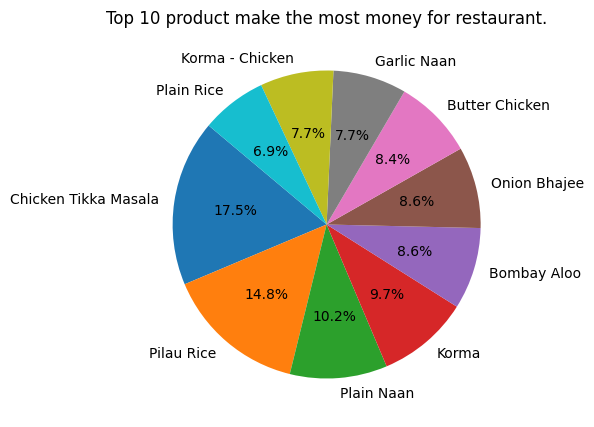

In [115]:
df["ItemPrice"] = df["ProductPrice"] * df["Quantity"]
group_product_py_itemprice = df.groupby("ProductName")["ItemPrice"].sum()
top_10_group_product_py_itemprice = group_product_py_itemprice.nlargest(10)
plt.figure(figsize=(5, 5))
plt.pie(top_10_group_product_py_itemprice, labels=top_10_group_product_py_itemprice.index, autopct='%1.1f%%',
        startangle=140)
plt.title("Top 10 product make the most money for restaurant.")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

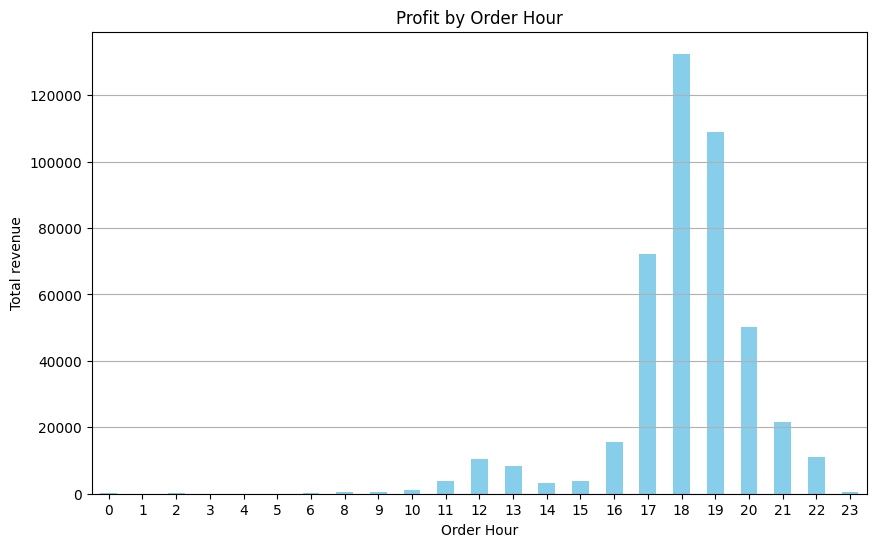

In [116]:
df["DateHour"] = df["Datetime"].dt.hour
hourly_income = df.groupby("DateHour")["ItemPrice"].sum()

plt.figure(figsize=(10, 6))
hourly_income.plot(kind='bar', color='skyblue')
plt.title('Profit by Order Hour')
plt.xlabel('Order Hour')
plt.ylabel('Total revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

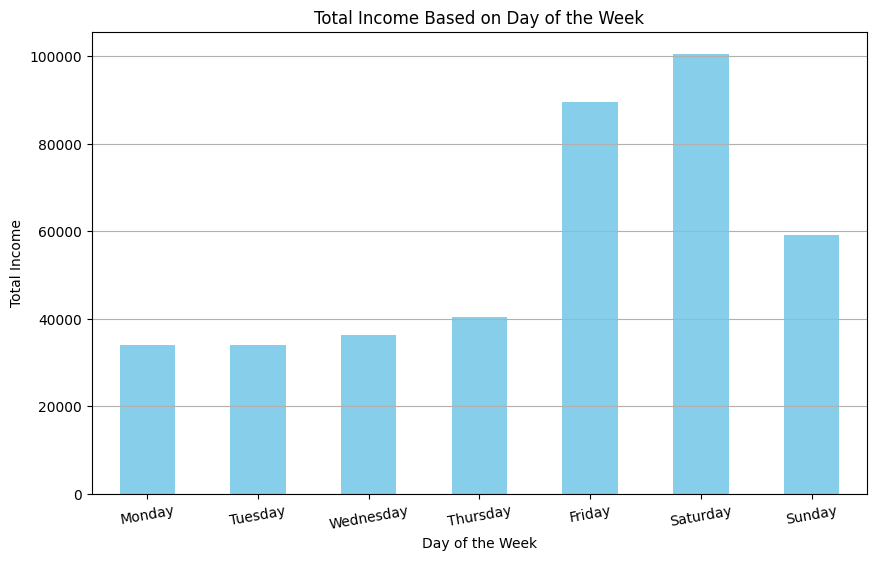

In [117]:
df['DayOfWeek'] = df['Datetime'].dt.dayofweek

days_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

df['DayOfWeek'] = df['DayOfWeek'].map(days_mapping)

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=ordered_days, ordered=True)

daily_income = df.groupby('DayOfWeek')['ProductPrice'].sum()

plt.figure(figsize=(10, 6))
daily_income.plot(kind='bar', color='skyblue')
plt.title('Total Income Based on Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Income')
plt.xticks(rotation=10)
plt.grid(axis='y')
plt.show()